# Importing all packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Reading data

In [3]:
df=pd.read_csv(r"C:\Users\Sourav Balan\Downloads\train_ctrUa4K.csv")
df1=pd.read_csv(r"C:\Users\Sourav Balan\Downloads\test_lAUu6dG.csv")

In [4]:
train_original=df.copy()
test_original=df1.copy()

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
df.shape

(614, 13)

In [9]:
df1.shape

(367, 12)

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Exploratory Data Analysis

In [16]:
data=[df,df1]
for dataset in data:
    #FILTER CATEGORICAL VARIABLES
    categorical_columns=[x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    #EXCLUDE ID COLS AND SOURCE:
    categorical_columns =[x for x in categorical_columns if x not in['Loan_ID']]
    
    
    #PRINT FREQUENCY OF CATEGORIES
for col in categorical_columns:
    print('\nFrequency of categories for variable %s'%col)
    print(df[col].value_counts())


Frequency of categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


C:\Users\Sourav Balan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


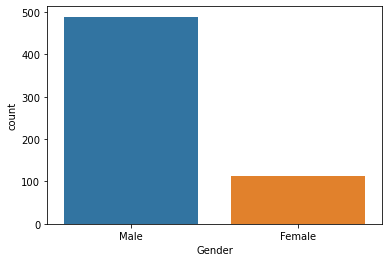

In [18]:
sns.countplot(df['Gender'])
plt.show()

In [19]:
pd.crosstab(df.Gender, df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


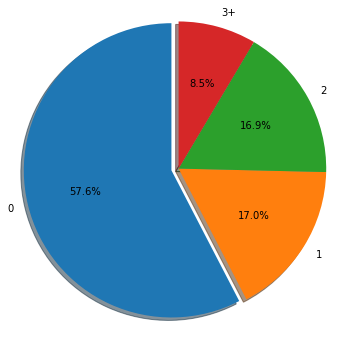

In [20]:
#DEPENDENDANTS

plt.figure(figsize=(6,6))
labels=['0','1','2','3+']
explode=(0.05,0,0,0)
size=[345,102,101,51]
plt.pie(size,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [21]:
#GET THE COUNT OF THE NUMBER OF DEPENDENTS

df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
pd.crosstab(df.Married, df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


C:\Users\Sourav Balan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

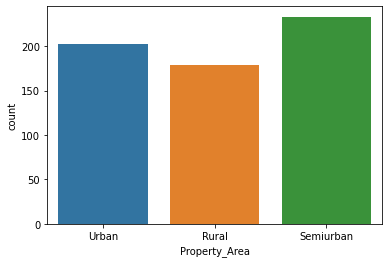

In [23]:
sns.countplot(df.Property_Area)

In [24]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [26]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:>

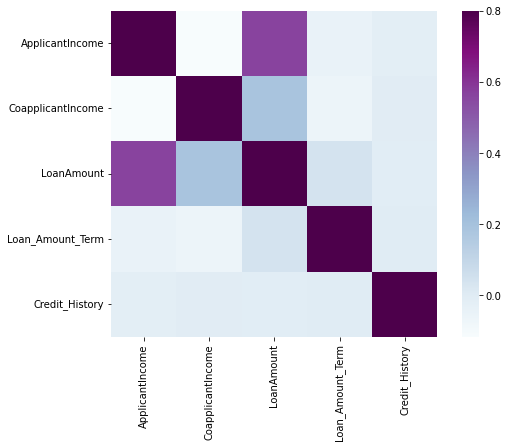

In [27]:
# HEATMAP REPRESENTATION OF THE CORRELATION

matrix=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")


# Preprocessing

In [29]:
#COUNT THE EMPTY VALUES IN EACH COLUMNS

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
#CONVERTING STRING VALUES(CATEGORICAL VALUES) TO INTEGER

df.Gender=df.Gender.map({"Female":0,"Male":1})
df.Married=df.Married.map({"No":0,"Yes":1})
df.Self_Employed=df.Self_Employed.map({"No":0,"Yes":1})
df.Education=df.Education.map({"Not":1,"Graduate":0})
df.Property_Area=df.Property_Area.map({"Urban":0,"Rural":1})
df.Loan_Status=df.Loan_Status.map({"N":0,"Y":1})
df.Dependents=df.Dependents.map({"3+":3,"0":0,"1":1,"2":2})

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,0.0,1
1,LP001003,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,1.0,0
2,LP001005,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,0.0,1
3,LP001006,1.0,1.0,0.0,NaN,0.0,2583,2358.0,120.000000,360.0,1.0,0.0,1
4,LP001008,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,0.0,1


In [32]:
#CONVERTING STRING VALUES(CATEGORICAL VALUES)TO INTEGER

df1.Gender=df1.Gender.map({"Female":0,"Male":1})
df1.Married=df1.Married.map({"No":0,"Yes":1})
df1.Self_Employed=df1.Self_Employed.map({"No":0,"Yes":1})
df1.Education=df1.Education.map({"Not":1,"Graduate":0})
df1.Property_Area=df1.Property_Area.map({"Urban":0,"Rural":1})
df1.Dependents=df1.Dependents.map({"3+":3,"0":0,"1":1,"2":2})
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0.0,0.0,0.0,5720,0,110.0,360.0,1.0,0.0
1,LP001022,1.0,1,1.0,0.0,0.0,3076,1500,126.0,360.0,1.0,0.0
2,LP001031,1.0,1,2.0,0.0,0.0,5000,1800,208.0,360.0,1.0,0.0
3,LP001035,1.0,1,2.0,0.0,0.0,2340,2546,100.0,360.0,NaN,0.0
4,LP001051,1.0,0,0.0,NaN,0.0,3276,0,78.0,360.0,1.0,0.0


# Filling Missing values

In [33]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Education"].fillna(df["Education"].mode()[0],inplace=True)
df["Property_Area"].fillna(df["Property_Area"].mode()[0],inplace=True)

In [34]:
#FIND THE MISSING VALUES IN LOAN AMOUNT TERM TO FILL

df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
#FILLING THE NULL VALUES USING THE MEDIAN IN LOANAMOUNT
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
df1["Gender"].fillna(df1["Gender"].mode()[0],inplace=True)
df1["Married"].fillna(df1["Married"].mode()[0],inplace=True)
df1["Dependents"].fillna(df1["Dependents"].mode()[0],inplace=True)
df1["Self_Employed"].fillna(df1["Self_Employed"].mode()[0],inplace=True)
df1["Credit_History"].fillna(df1["Credit_History"].mode()[0],inplace=True)
df1["Education"].fillna(df1["Education"].mode()[0],inplace=True)
df1["Property_Area"].fillna(df1["Property_Area"].mode()[0],inplace=True)

In [37]:
#FIND THE MISSING VALUES IN LOAN AMOUNT TERM TO FILL
df1["Loan_Amount_Term"].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [38]:
df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].mode()[0],inplace=True)
#FILLING THE NULL VALUES USING THE MEDIAN IN LOANAMOUNT
df1["LoanAmount"].fillna(df1["LoanAmount"].median(),inplace=True)
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Modelling and Fine tuning

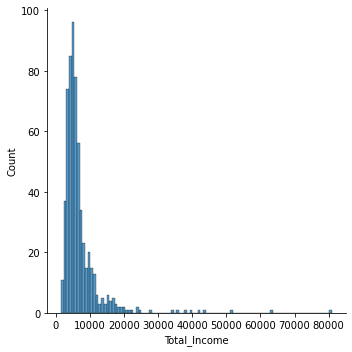

In [39]:
df['Total_Income']=df["ApplicantIncome"]+df['CoapplicantIncome']
df1['Total_Income']=df1["ApplicantIncome"]+df1['CoapplicantIncome']
sns.displot(df["Total_Income"])

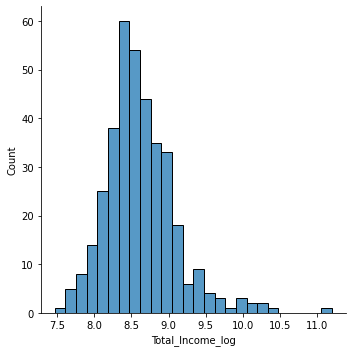

In [40]:
df['Total_Income_log']=np.log(df["Total_Income"])
df1['Total_Income_log']=np.log(df1["Total_Income"])
sns.displot(df1["Total_Income_log"])

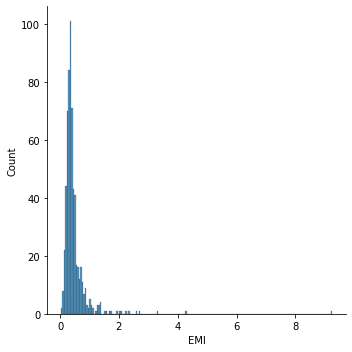

In [41]:
df['EMI']=df["LoanAmount"]/df['Loan_Amount_Term']
df1['EMI']=df1["LoanAmount"]/df1['Loan_Amount_Term']
sns.displot(df["EMI"])

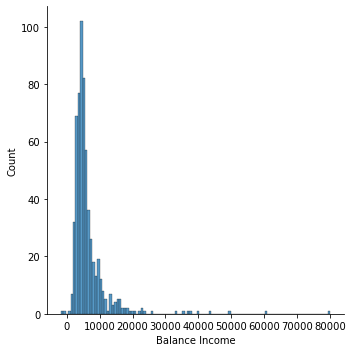

In [42]:
df['Balance Income']=df["Total_Income"]-(df['EMI']*1000)
df1['Balance Income']=df1["Total_Income"]-(df1['EMI']*1000)
sns.displot(df["Balance Income"])

In [43]:
df=df.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5849.0,8.674026,0.406700,5442.299550
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6000.0,8.699515,0.391667,5608.333333


In [44]:
df.dtypes

Gender              float64
Married             float64
Dependents          float64
Education           float64
Self_Employed       float64
Credit_History      float64
Property_Area       float64
Loan_Status           int64
Total_Income        float64
Total_Income_log    float64
EMI                 float64
Balance Income      float64
dtype: object

In [45]:
df1=df1.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
df1=df1.drop("Loan_ID",axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,0.0,0.0,0.0,1.0,0.0,5720,8.651724,0.305556,5414.444444
1,1.0,1,1.0,0.0,0.0,1.0,0.0,4576,8.428581,0.350000,4226.000000
2,1.0,1,2.0,0.0,0.0,1.0,0.0,6800,8.824678,0.577778,6222.222222
3,1.0,1,2.0,0.0,0.0,1.0,0.0,4886,8.494129,0.277778,4608.222222
4,1.0,0,0.0,0.0,0.0,1.0,0.0,3276,8.094378,0.216667,3059.333333


In [46]:
df1.dtypes

Gender              float64
Married               int64
Dependents          float64
Education           float64
Self_Employed       float64
Credit_History      float64
Property_Area       float64
Total_Income          int64
Total_Income_log    float64
EMI                 float64
Balance Income      float64
dtype: object

In [47]:
x=df.drop("Loan_Status",1)
y=df.Loan_Status

C:\Users\SOURAV~1\AppData\Local\Temp/ipykernel_14212/2968297848.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df.drop("Loan_Status",1)


In [48]:
x=pd.get_dummies(x)
df=pd.get_dummies(df)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)
acc_l=accuracy_score(y_test,pred_l)*100
acc_l

74.05405405405405

In [56]:
pred_test=logmodel.predict(df1)
loancsv=pd.DataFrame({"Loan_ID":test_original["Loan_ID"],"Loan_Status":pred_test})
loancsv

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [57]:
loancsv["Loan_Status"].replace(0,"N",inplace=True)
loancsv["Loan_Status"].replace(1,"Y",inplace=True)
loancsv

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [61]:
loancsv.to_csv(r"C:\Users\Sourav Balan\Downloads\sample_submission_49d68Cx.csv",index=False)